# Get Data

In [41]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

In [ ]:
url = "https://editorial.rottentomatoes.com/guide/oscars-best-and-worst-best-pictures/"

In [ ]:
response = requests.get(url)
if response.status_code != 200:
        raise Exception("URL could not be accessed")

In [ ]:
soup = BeautifulSoup(response.text, "html.parser")

### d = {\<show_title>: {\<statistic>: \<value>, ...}, ...}

In [ ]:
l = []

In [ ]:
for i in range(1, 97):
    title_select = f"#row-index-{i} > div.col-sm-18.col-full-xs.countdown-item-content > div.row.countdown-item-title-bar > div.col-sm-20.col-full-xs > div > div > h2 > a"
    title = soup.css.select(title_select)[0].text.strip()

    year_select = f"#row-index-{i} > div.col-sm-18.col-full-xs.countdown-item-content > div.row.countdown-item-title-bar > div.col-sm-20.col-full-xs > div > div > h2 > span.subtle.start-year"
    year = soup.css.select(year_select)[0].text.strip()

    tomato_select = f"#row-index-{i} > div.col-sm-18.col-full-xs.countdown-item-content > div.row.countdown-item-title-bar > div.col-sm-20.col-full-xs > div > div > h2 > span.tMeterScore"
    tomato = soup.css.select(tomato_select)[0].text.strip()

    consensus_select = f"#row-index-{i} > div.col-sm-18.col-full-xs.countdown-item-content > div.row.countdown-item-details > div > div.info.critics-consensus"
    consensus = soup.css.select(consensus_select)[0].text.strip()

    synopsis_select = f"#row-index-{i} > div.col-sm-18.col-full-xs.countdown-item-content > div.row.countdown-item-details > div > div.info.synopsis"
    synopsis = soup.css.select(synopsis_select)[0].text.strip()

    cast_select = f"#row-index-{i} > div.col-sm-18.col-full-xs.countdown-item-content > div.row.countdown-item-details > div > div.info.cast"
    cast = soup.css.select(cast_select)[0].text.strip()

    director_select = f"#row-index-{i} > div.col-sm-18.col-full-xs.countdown-item-content > div.row.countdown-item-details > div > div.info.director > a"
    director = soup.css.select(director_select)[0].text.strip()

    data = {}
    data["Title"] = title
    data["Year"] = year
    data["Rotten Tomatoes Score"] = tomato
    data["Critic Consensus"] = consensus
    data["Synopsis"] = synopsis
    data["Cast"] = cast
    data["Director"] = director
    l.append(data)

In [ ]:
df = pd.DataFrame(l)
df.to_csv('movies.csv', index=False, header=True)

# Clean Data

In [ ]:
df = pd.read_csv('movies.csv')

In [ ]:
df

In [ ]:
def clean_year(y):
    return y[1:5]

def clean_rtscore(rts):
    return int(rts[0:2])

def clean_consensus(con):
    return con[19:]

def clean_synopsis(syn):
    return syn[10:-7]

def clean_cast(cast):
    return cast[10:]

In [ ]:
df['Year'] = df['Year'].apply(clean_year)

In [ ]:
df['Rotten Tomatoes Score (%)'] = df['Rotten Tomatoes Score'].apply(clean_rtscore)
df = df.drop('Rotten Tomatoes Score', axis=1)

In [ ]:
df['Critic Consensus'] = df['Critic Consensus'].apply(clean_consensus)

In [ ]:
df['Synopsis'] = df['Synopsis'].apply(clean_synopsis)

In [ ]:
df['Cast'] = df['Cast'].apply(clean_cast)

In [ ]:
df = df.set_index('Title')

In [ ]:
df.to_csv('movies_cleaned.csv')

# Run Analysis

In [2]:
df = pd.read_csv('movies_cleaned.csv')

In [3]:
df

,Title,Year,Critic Consensus,Synopsis,Cast,Director,Rotten Tomatoes Score (%)
0,Parasite,2019,"An urgent, brilliantly layered look at timely ...",Greed and class discrimination threaten the ne...,"Song Kang-ho, Lee Sun-kyun, Jo Yeo-jeong, Choi...",Bong Joon Ho,99
1,Casablanca,1942,An undisputed masterpiece and perhaps Hollywoo...,"Rick Blaine (Humphrey Bogart), who owns a nigh...","Humphrey Bogart, Ingrid Bergman, Paul Henreid,...",Michael Curtiz,99
2,All About Eve,1950,"Smart, sophisticated, and devastatingly funny,...",Backstage story revolving around aspiring actr...,"Bette Davis, Anne Baxter, Celeste Holm, George...",Joseph L. Mankiewicz,99
3,On the Waterfront,1954,With his electrifying performance in Elia Kaza...,Dockworker Terry Malloy (Marlon Brando) had be...,"Marlon Brando, Eva Marie Saint, Karl Malden, L...",Elia Kazan,99
4,Moonlight,2016,Moonlight uses one man's story to offer a rema...,A look at three defining chapters in the life ...,"Mahershala Ali, Alex R. Hibbert, Ashton Sander...",Barry Jenkins,98
...,...,...,...,...,...,...,...
91,Cavalcade,1933,"Though solidly acted and pleasant to look at, ...",Upper-crust Londoners Robert and Jane Marryot ...,"Diana Wynyard, Clive Brook, Una O'Connor, Herb...",Frank Lloyd,65
92,Out of Africa,1985,Though lensed with stunning cinematography and...,"Initially set on being a dairy farmer, the ari...","Meryl Streep, Robert Redford, Klaus Maria Bran...",Sydney Pollack,63
93,Cimarron,1931,Cimarron is supported by a strong performance ...,"In 1889, adventurous lawyer and newspaper edit...","Richard Dix, Irene Dunne, Estelle Taylor, Nanc...",Wesley Ruggles,52
94,The Greatest Show on Earth,1952,"The Greatest Show on Earth is melodramatic, sh...","""The Greatest Show on Earth"" is a dazzling spe...","Betty Hutton, Charlton Heston, Cornel Wilde, D...",Cecil B. DeMille,50


Ideas:<br>
- Create sets of directors and cast members and point them to an avg Rotten Tomatoes Score.<br>
- Correlation Analysis between Year and Rotten Tomatoes Score<br>
- (maybe) Compare sentiment analysis score of Critic Consensus and Synopsis to Rotten Tomatoes Score

In [4]:
avg_rt_director = {}
for director in set(df["Director"]):
    avg_rt_director[director] = None

In [5]:
d_rt = df.loc[:, ["Director", "Rotten Tomatoes Score (%)"]]

In [6]:
for i in range(len(d_rt)):
    director = d_rt.iloc[i]['Director']
    score = d_rt.iloc[i]['Rotten Tomatoes Score (%)']
    if not avg_rt_director[director]:
        avg_rt_director[director] = [score]
    else:
        avg_rt_director[director].append(score)

In [7]:
for director in avg_rt_director.keys():
    avg_rt_director[director] = np.average(avg_rt_director[director])

In [8]:
avg_rt_cast = {}
for i in range(96):
    for cast in df["Cast"].iloc[i].split(", "):
        avg_rt_cast[cast] = None

In [9]:
c_rt = df.loc[:, ["Cast", "Rotten Tomatoes Score (%)"]]

In [10]:
for i in range(96):
    for cast in c_rt.iloc[i]["Cast"].split(", "):
        if not avg_rt_cast[cast]:
            avg_rt_cast[cast] = [c_rt.iloc[i]["Rotten Tomatoes Score (%)"]]
        else:
            avg_rt_cast[cast].append(c_rt.iloc[i]["Rotten Tomatoes Score (%)"])

In [11]:
for cast in avg_rt_cast.keys():
    avg_rt_cast[cast] = np.average(avg_rt_cast[cast])

In [12]:
year_score = df[["Year", "Rotten Tomatoes Score (%)"]]

In [13]:
years = np.arange(1927, 2023)

In [14]:
year_score_dict = {}
for y in years:
    year_score_dict[y] = [0.0]

In [15]:
for i in range(96):
    y = year_score.iloc[i]["Year"]
    s = year_score.iloc[i]["Rotten Tomatoes Score (%)"]
    if year_score_dict[y] == [0.0]:
        year_score_dict[y] = [s]
    else:
        year_score_dict[y].append(s)

In [16]:
for y in years:
    if len(year_score_dict[y]) == 2:
        year_score_dict[y+1] = [year_score_dict[y][1]]
        year_score_dict[y] = year_score_dict[y][0]
    else:
        year_score_dict[y] = year_score_dict[y][0]

In [17]:
x = []
y = []
for k, v in year_score_dict.items():
    x.append(k)
    y.append(v)

In [18]:
with open("year_score_x.txt", "w") as f:
    for point in x:
        f.write(str(point) + '\n')
with open("year_score_y.txt", "w") as f:
    for point in y:
        f.write(str(point) + '\n')

In [19]:
r = np.corrcoef(x,y)[0][1]

In [20]:
with open("year_score_correlation.txt", "w") as f:
    f.write(str(r))

In [21]:
pd.DataFrame.from_dict(avg_rt_director, orient="index", columns=["Score"]).to_csv("avg_rt_director.csv")

In [22]:
pd.DataFrame.from_dict(avg_rt_cast, orient="index", columns=["Score"]).to_csv("avg_rt_cast.csv")

# Visualize Results

In [46]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rc("font", family="serif")
plt.style.use("dark_background")

In [24]:
# get data
avg_rt_director = pd.read_csv("avg_rt_director.csv")
avg_rt_cast = pd.read_csv("avg_rt_cast.csv")
with open("year_score_correlation.txt") as f:
    data = float(f.read())
x, y = [], []
with open("year_score_x.txt") as f:
    for line in f:
        x.append(int(line))
with open("year_score_y.txt") as f:
    for line in f:
        y.append(int(line))

In [25]:
m, b = np.polyfit(x, y, 1)
x_graph = np.linspace(1927, 2023, num=100)

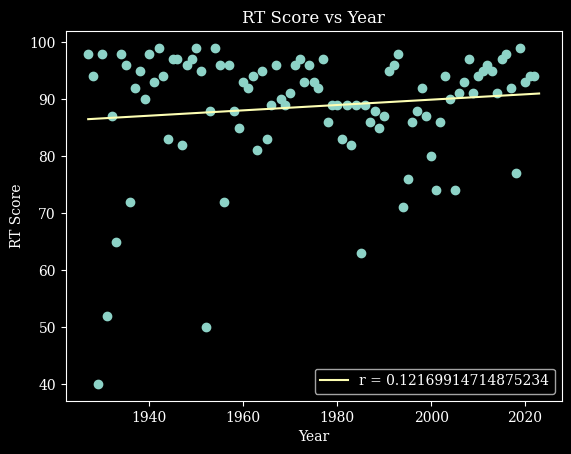

In [80]:
plt.title('RT Score vs Year')
plt.scatter(x, y)
plt.plot(x_graph, m*x_graph+b, color="C1", label=f"r = {data}")
plt.xlabel("Year")
plt.ylabel("RT Score")
plt.legend()
plt.savefig("year_score_correlation.png")
plt.show()

In [78]:
rt_d_sorted = avg_rt_director.sort_values(by=["Score"], ascending=False).head(n=10).reset_index(drop=True)
rt_d_sorted.to_csv('rt_d_sorted.csv')
print("Top 10 Directors (Avg Rt Score)")
for v in rt_d_sorted.iloc[:].values:
    print(f"- {v[0]} ({v[1]})")

Top 10 Directors (Avg Rt Score)
- Michael Curtiz (99.0)
- Bong Joon Ho (99.0)
- Joseph L. Mankiewicz (99.0)
- Steven Spielberg (98.0)
- Alfred Hitchcock (98.0)
- F.W. Murnau (98.0)
- Barry Jenkins (98.0)
- Lewis Milestone (98.0)
- Kathryn Bigelow (97.0)
- Woody Allen (97.0)


In [79]:
rt_c_sorted = avg_rt_cast.sort_values(by=["Score"], ascending=False).head(n=25).reset_index(drop=True)
rt_c_sorted.to_csv('rt_c_sorted.csv')
print("Top 25 Actors (Avg Rt Score)")
for v in rt_c_sorted.iloc[:].values:
    print(f"- {v[0]} ({v[1]})")

Top 25 Actors (Avg Rt Score)
- Song Kang-ho (99.0)
- Claude Rains (99.0)
- Lee J. Cobb (99.0)
- Eva Marie Saint (99.0)
- Anne Baxter (99.0)
- Bette Davis (99.0)
- Lee Sun-kyun (99.0)
- Paul Henreid (99.0)
- Ingrid Bergman (99.0)
- Choi Woo-sik (99.0)
- Jo Yeo-jeong (99.0)
- Humphrey Bogart (99.0)
- George Sanders (98.5)
- Bodil Rosing (98.0)
- Margaret Livingston (98.0)
- Walter Connolly (98.0)
- Janet Gaynor (98.0)
- George O'Brien (98.0)
- John Wray (98.0)
- Louis Wolheim (98.0)
- Lew Ayres (98.0)
- Judith Anderson (98.0)
- Joan Fontaine (98.0)
- Roscoe Karns (98.0)
- Raymond Griffith (98.0)


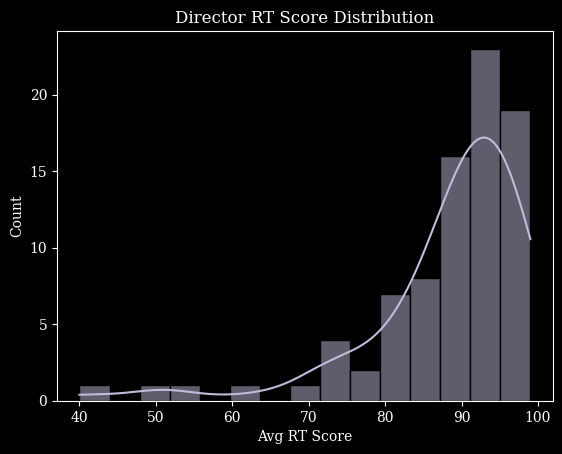

In [107]:
sns.histplot(x="Score", data=avg_rt_director, kde=True, color="C2", edgecolor="black")
plt.title("Director RT Score Distribution")
plt.xlabel("Avg RT Score")
plt.savefig("rt_director_dist.png")
plt.show()

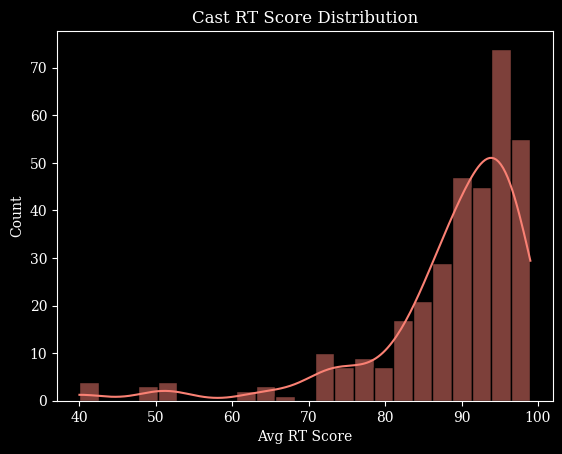

In [108]:
sns.histplot(x="Score", data=avg_rt_cast, kde=True, color="C3", edgecolor="black")
plt.title("Cast RT Score Distribution")
plt.xlabel("Avg RT Score")
plt.savefig("rt_cast_dist.png")
plt.show()